## Assignment 01
### Name :- ADIKARI A.M.A.D.
### Index No :- 190021A

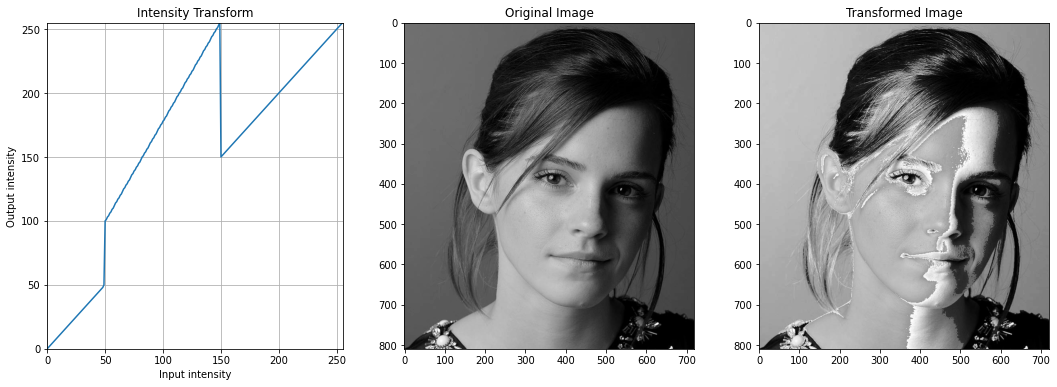

In [156]:
# Question 01
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert image is not None

# Intensity transformation
t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
filtered_image = cv.LUT(image, t)

fig, ax = plt.subplots(1, 3, figsize = (18, 6))
# graph
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_title("Intensity Transform")
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)

# images
ax[1].imshow(image, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title("Original Image")

ax[2].imshow(filtered_image, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title("Transformed Image")
plt.show()

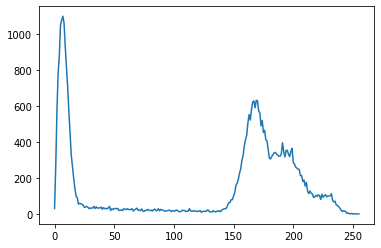

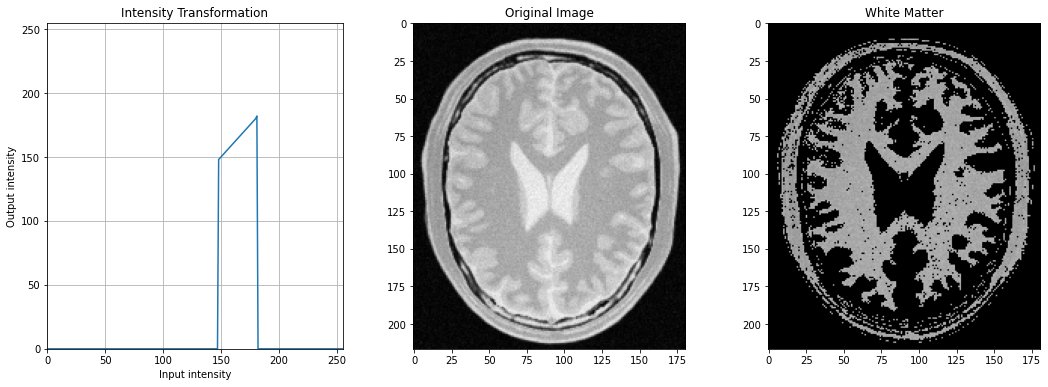

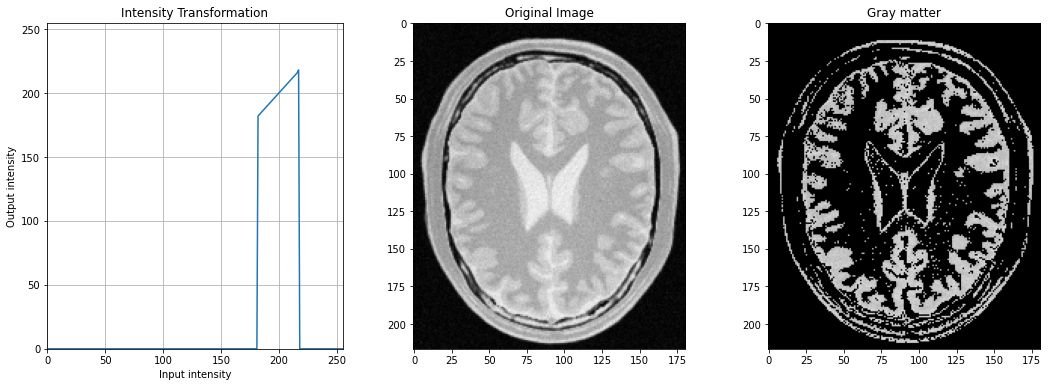

In [168]:
#Question 02
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert image is not None
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

hist = cv.calcHist([image], [0],None,[256],[0, 256])
plt.plot(hist)

# white matter image
# intensity transformation
white_begin = 148
white_end = 182
t1 = np.linspace(0, 0, white_begin)
t2 = np.linspace(white_begin, white_end, white_end - white_begin)
t3 = np.linspace(0, 0, 256 - white_end)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
filtered_image = cv.LUT(image, t)
# graph
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_title("Intensity Transformation")
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
# images
ax[1].imshow(image, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title("Original Image")
ax[2].imshow(filtered_image, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title("White Matter")

# gray matter
# intensity transformtaion
gray_begin = 182
gray_end = 218
t1 = np.linspace(0, 0, gray_begin)
t2 = np.linspace(gray_begin, gray_end, gray_end - gray_begin)
t3 = np.linspace(0, 0, 256 - gray_end)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
filtered_image = cv.LUT(image, t)
# graph
fig, ax = plt.subplots(1, 3, figsize = (18,6))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_title("Intensity Transformation")
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
# images
ax[1].imshow(image, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title("Original Image")
ax[2].imshow(filtered_image, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title("Gray matter")

plt.show()

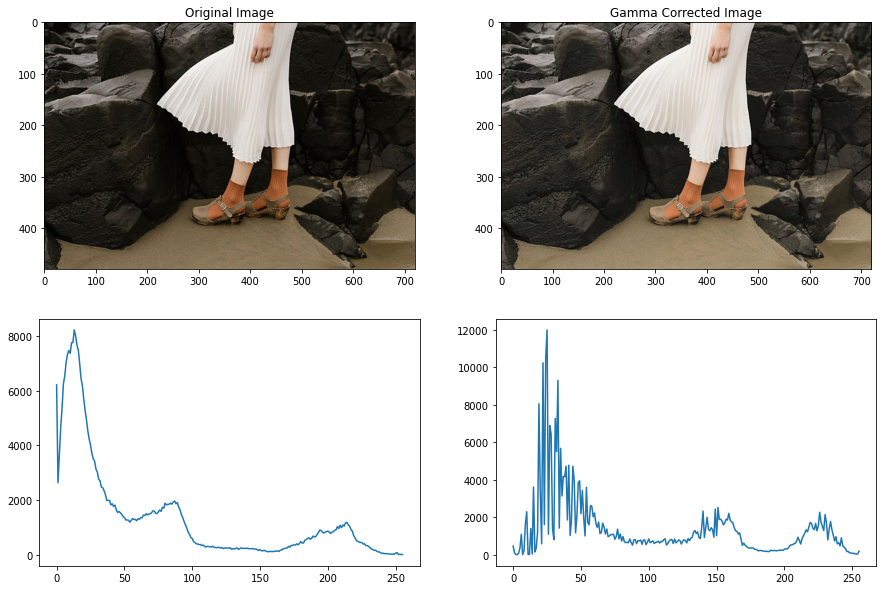

In [169]:
# Question 03
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('highlights_and_shadows.jpg')
assert image is not None

Lab_image = cv.cvtColor(image, cv.COLOR_BGR2Lab)
img = np.array(Lab_image)
hist_img = cv.calcHist([image], [0], None, [256], [0, 256])
L,a,b = cv.split(img)
ga = 0.75
t = np.array([(p/255)**ga*255 for p in range(0, 256)]).astype(np.uint8)
L = cv.LUT(L, t)
modified_image = cv.merge([L, a, b])

new_image = cv.cvtColor(modified_image, cv.COLOR_Lab2RGB)
hist_new_image = cv.calcHist([new_image], [0], None, [256], [0, 256])
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize = (15, 10))
ax[0][0].imshow(image)
ax[0][0].set_title("Original Image")
ax[0][1].imshow(new_image)
ax[0][1].set_title("Gamma Corrected Image")
ax[1][0].plot(hist_img)
ax[1][1].plot(hist_new_image)
plt.show()

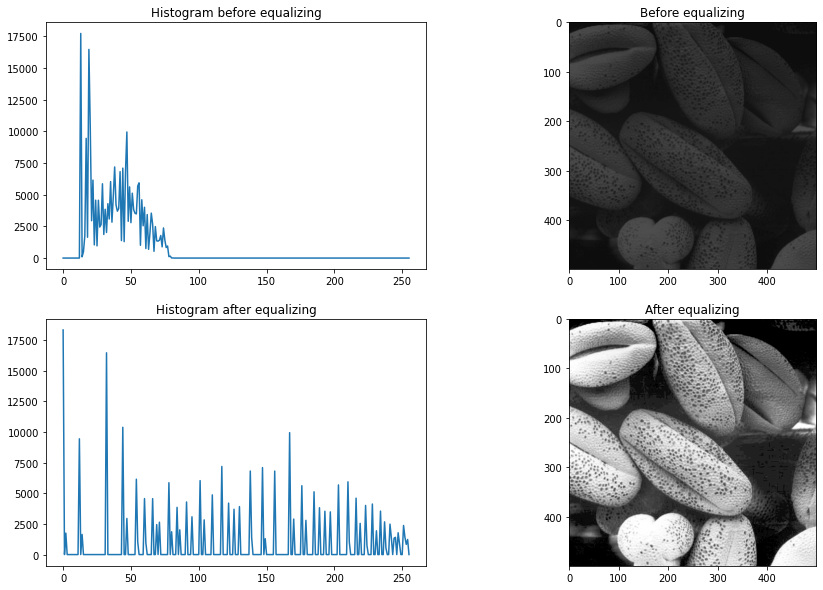

In [175]:
# Question 04
img = cv.imread("shells.png",cv.IMREAD_GRAYSCALE)

# function for equalizing
def Equalizer(img):
    histo, _ = np.histogram(img.flatten(), 256, [0, 255])
    cdf = histo.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) / (cdf_m.max() - cdf_m.min()) * 255
    cdf = np.ma.filled(cdf_m, 0)
    imgEq = cdf[img.astype('uint8')]
    histEq, _ = np.histogram(imgEq.flatten(), 256, [0, 256])
    return imgEq, histo, histEq

g, hist_f, hist_g = Equalizer(img)

fig, ax  = plt.subplots(2,2,figsize = (15, 10))
ax[0][0].plot(hist_f)
ax[0][0].set_title("Histogram before equalizing")
ax[0][1].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0][1].set_title("Before equalizing")

ax[1][0].plot(hist_g)
ax[1][0].set_title("Histogram after equalizing")
ax[1][1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1][1].set_title("After equalizing")

plt.show()

In [24]:
# Question 05
# part (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# definition for SSD calculation
def SSD(img1, img2):
  rows = int(img1.shape[0])
  cols = int(img1.shape[1])
  ssd =  np.sqrt(np.sum((img1-img2)**2))/(rows*cols*img1.shape[2])
  return(ssd)

# definition for nearest_neighbour zooming
def nearest_zoom(img, s):
    rows, cols = img.shape[0] * s, img.shape[1] * s
    zoomed_img = np.zeros((rows, cols, 3), dtype=img.dtype)
    for i in range(0, rows-4):
        for j in range(0, cols-4):
            for k in range(0, 3):
                zoomed_img[i, j, k] = img[int(round(i/s)), int(round(j/s)), k]
    return zoomed_img

# part (b)
# function for bilinear zooming
def bilinear_zoom(img, s):
    rows = img.shape[0]*s
    cols = img.shape[1]*s

    zoomed_img = np.zeros((rows, cols, 3), dtype=img.dtype)
    for i in range(0, rows-4):
        for j in range(0, cols-4):
            x_diff, y_diff = i/s - np.floor(i/s), j/s - np.floor(j/s) 
            for k in range(0, 3):
                tl_val = img[int(np.floor(i/s)), int(np.floor(j/s)), k]
                tr_val = img[int(np.floor(i/s)), int(np.ceil(j/s)), k]
                bl_val = img[int(np.ceil(i/s)), int(np.floor(j/s)), k]
                br_val = img[int(np.ceil(i/s)), int(np.ceil(j/s)), k]
                x_l_val = tl_val*(1-x_diff) + bl_val*x_diff
                x_r_val = tr_val*(1-x_diff) + br_val*x_diff
                color_val = x_l_val*(1-y_diff) + x_r_val*y_diff
                zoomed_img[i, j, k] = color_val
    return zoomed_img

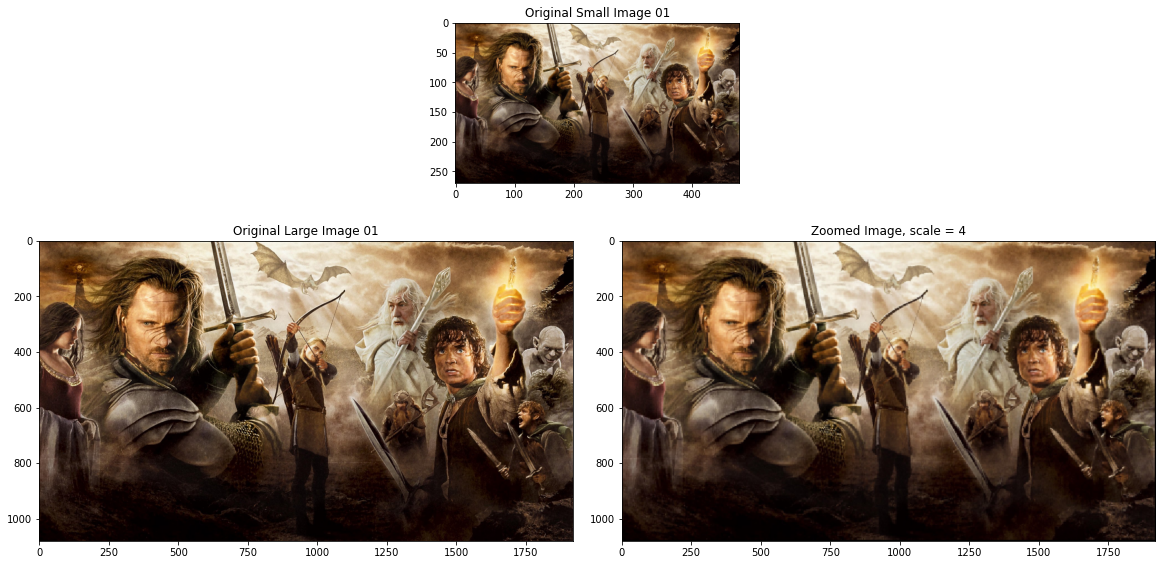

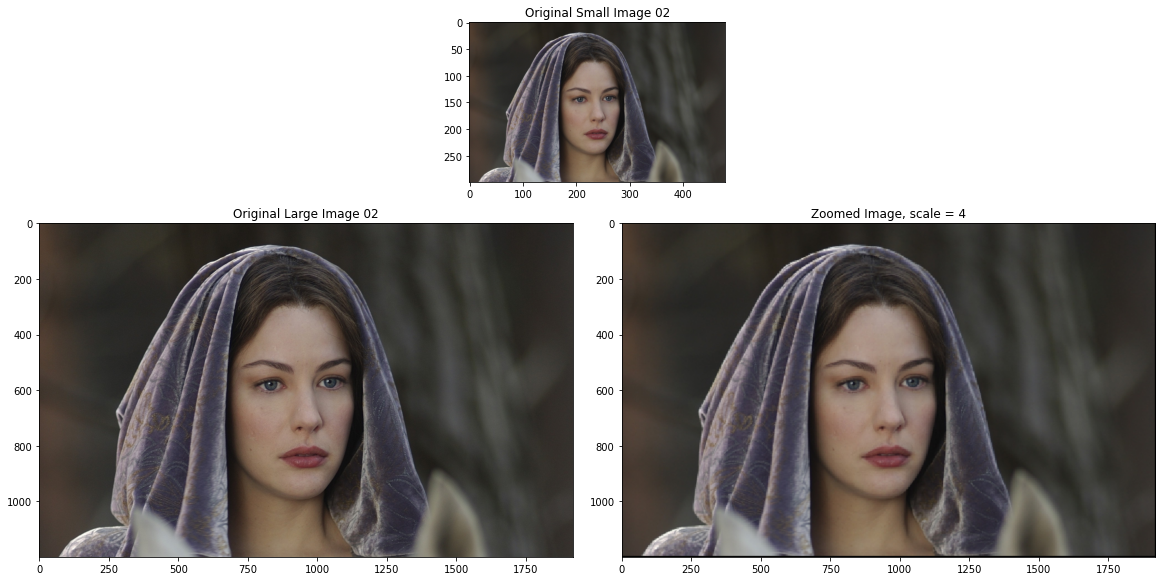

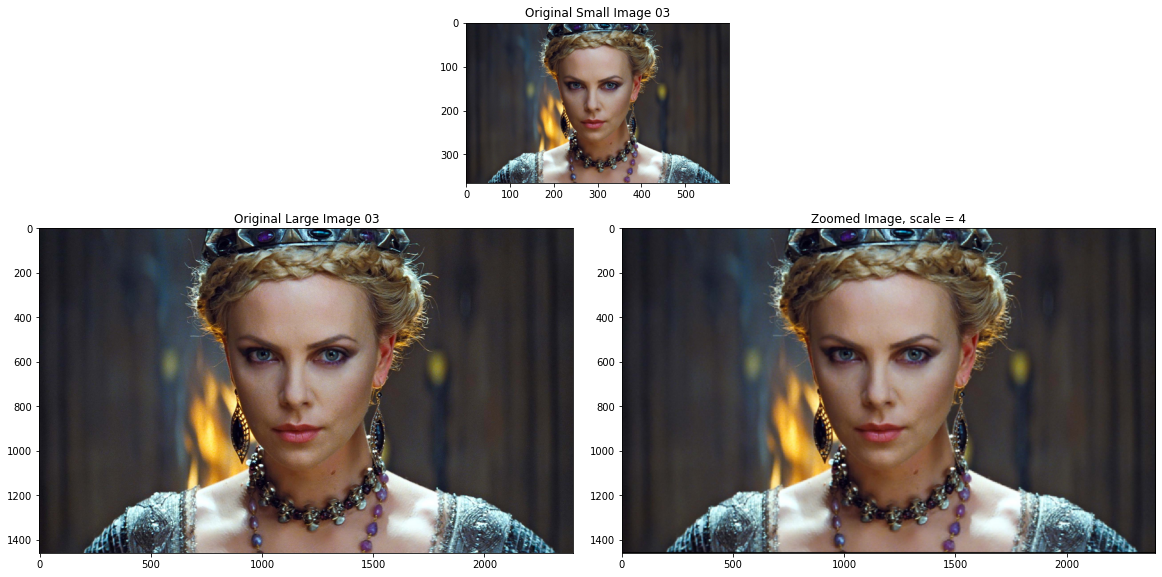

In [11]:
img1_s = cv.imread('./a1q5images/im01small.png')
img1_l = cv.imread('./a1q5images/im01.png')
img1_s = cv.cvtColor(img1_s, cv.COLOR_BGR2RGB)
img1_l = cv.cvtColor(img1_l, cv.COLOR_BGR2RGB)

img2_s = cv.imread('./a1q5images/im02small.png')
img2_l = cv.imread('./a1q5images/im02.png')
img2_s = cv.cvtColor(img2_s, cv.COLOR_BGR2RGB)
img2_l = cv.cvtColor(img2_l, cv.COLOR_BGR2RGB)

img3_s = cv.imread('./a1q5images/im03small.png')
img3_l = cv.imread('./a1q5images/im03.png')
img3_s = cv.cvtColor(img3_s, cv.COLOR_BGR2RGB)
img3_l = cv.cvtColor(img3_l, cv.COLOR_BGR2RGB)


# nearest-neighbour zoom method
s = 4
zoomed_img1 = nearest_zoom(img1_s, s)
zoomed_img2 = nearest_zoom(img2_s, s)
zoomed_img3 = nearest_zoom(img3_s, s)

# image 1
gs = plt.GridSpec(3, 4)
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(gs[0, 1:3])
ax1.imshow(img1_s)
ax1.set_title('Original Small Image 01')
ax2 = plt.subplot(gs[1:, :2])
ax2.imshow(img1_l)
ax2.set_title('Original Large Image 01')
ax3 = plt.subplot(gs[1:, 2:])
ax3.imshow(zoomed_img1)
ax3.set_title('Zoomed Image, scale = 4')

# # image 2
gs = plt.GridSpec(3, 4)
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(gs[0, 1:3])
ax1.imshow(img2_s)
ax1.set_title('Original Small Image 02')
ax2 = plt.subplot(gs[1:, :2])
ax2.imshow(img2_l)
ax2.set_title('Original Large Image 02')
ax3 = plt.subplot(gs[1:, 2:])
ax3.imshow(zoomed_img2)
ax3.set_title('Zoomed Image, scale = 4')

# image 3
gs = plt.GridSpec(3, 4)
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(gs[0, 1:3])
ax1.imshow(img3_s)
ax1.set_title('Original Small Image 03')
ax2 = plt.subplot(gs[1:, :2])
ax2.imshow(img3_l)
ax2.set_title('Original Large Image 03')
ax3 = plt.subplot(gs[1:, 2:])
ax3.imshow(zoomed_img3)
ax3.set_title('Zoomed Image, scale = 4')

plt.show()

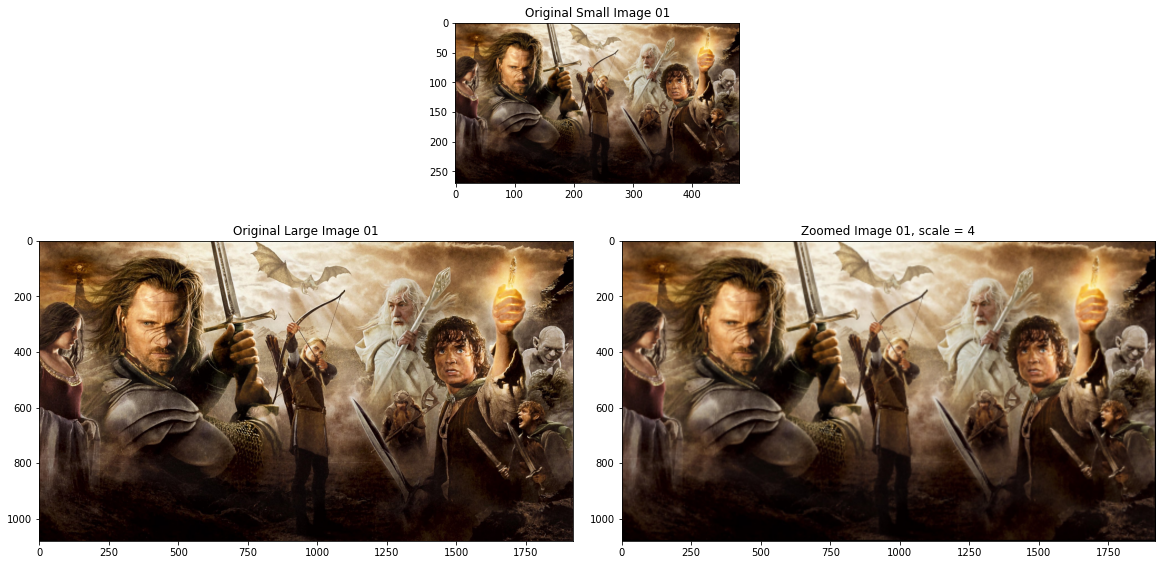

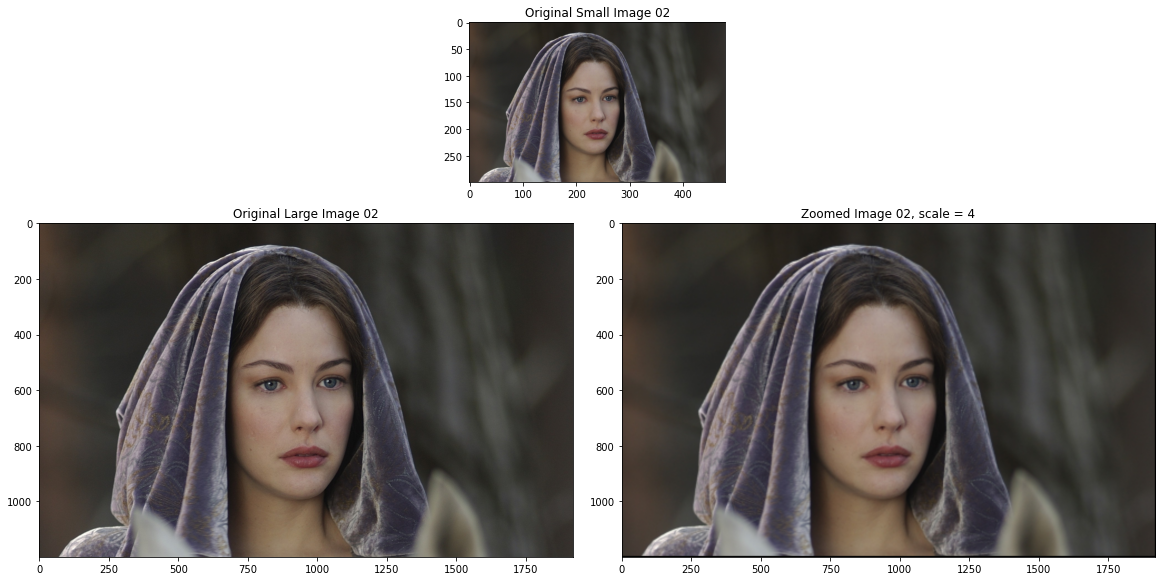

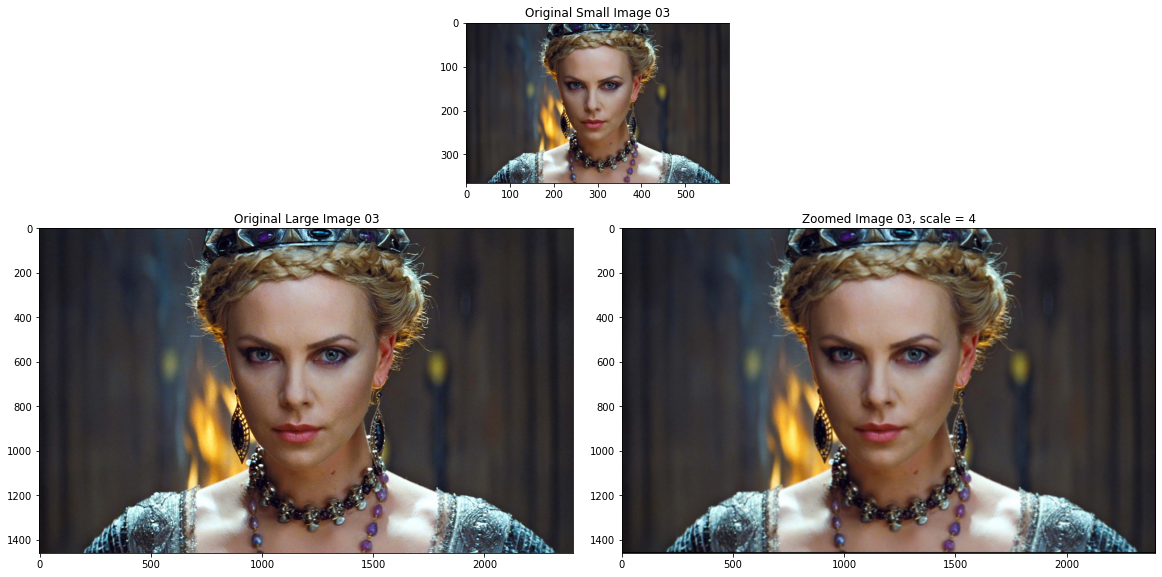

In [12]:
# bilinear interpolation zoom method
s = 4
zoomed_img1 = bilinear_zoom(img1_s, s)  
zoomed_img2 = bilinear_zoom(img2_s, s)  
zoomed_img3 = bilinear_zoom(img3_s, s)  

# image 01
gs = plt.GridSpec(3, 4)
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(gs[0, 1:3])
ax1.imshow(img1_s)
ax1.set_title('Original Small Image 01')
ax2 = plt.subplot(gs[1:, :2])
ax2.imshow(img1_l)
ax2.set_title('Original Large Image 01')
ax3 = plt.subplot(gs[1:, 2:])
ax3.imshow(zoomed_img1)
ax3.set_title('Zoomed Image 01, scale = 4')

# image 02
gs = plt.GridSpec(3, 4)
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(gs[0, 1:3])
ax1.imshow(img2_s)
ax1.set_title('Original Small Image 02')
ax2 = plt.subplot(gs[1:, :2])
ax2.imshow(img2_l)
ax2.set_title('Original Large Image 02')
ax3 = plt.subplot(gs[1:, 2:])
ax3.imshow(zoomed_img2)
ax3.set_title('Zoomed Image 02, scale = 4')

# image 03
gs = plt.GridSpec(3, 4)
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(gs[0, 1:3])
ax1.imshow(img3_s)
ax1.set_title('Original Small Image 03')
ax2 = plt.subplot(gs[1:, :2])
ax2.imshow(img3_l)
ax2.set_title('Original Large Image 03')
ax3 = plt.subplot(gs[1:, 2:])
ax3.imshow(zoomed_img3)
ax3.set_title('Zoomed Image 03, scale = 4')

plt.show()

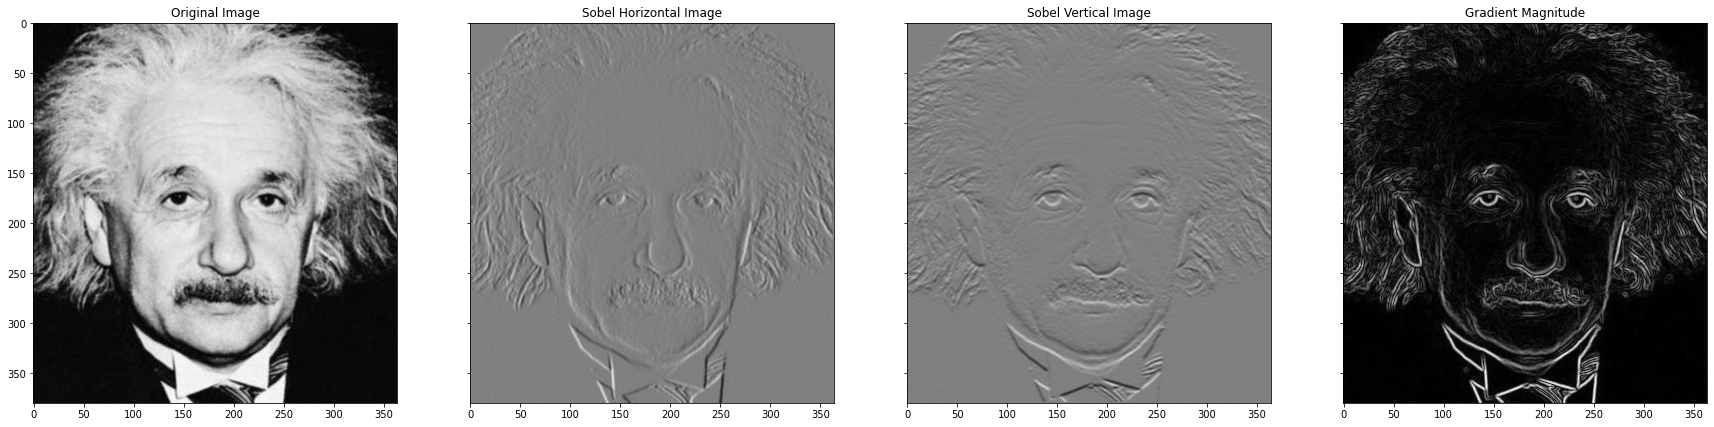

In [83]:
# Question 06

# part (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

sobel_h_kernal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float')
sobel_h_img = cv.filter2D(image, -1, sobel_h_kernal)
sobel_v_kernal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]] , dtype = 'float')
sobel_v_img = cv.filter2D(image, -1, sobel_v_kernal)

gradient_img = (sobel_v_img**2 + sobel_h_img**2)**0.5

fig, ax = plt.subplots(1, 4, sharex='all', sharey='all', figsize = (30, 10))
ax[0].imshow(image,  cmap=  'gray', vmin = 0, vmax = 255) 
ax[0].set_title('Original Image')
ax[1].imshow(sobel_h_img, cmap=  'gray' , vmin = -1020 , vmax = 1020 )
ax[1].set_title('Sobel Horizontal Image')
ax[2].imshow(sobel_v_img,cmap=  'gray' , vmin = -1020 , vmax = 1020  )
ax[2].set_title('Sobel Vertical Image')
ax[3].imshow(gradient_img , cmap=  'gray')
ax[3].set_title('Gradient Magnitude')
plt.show()

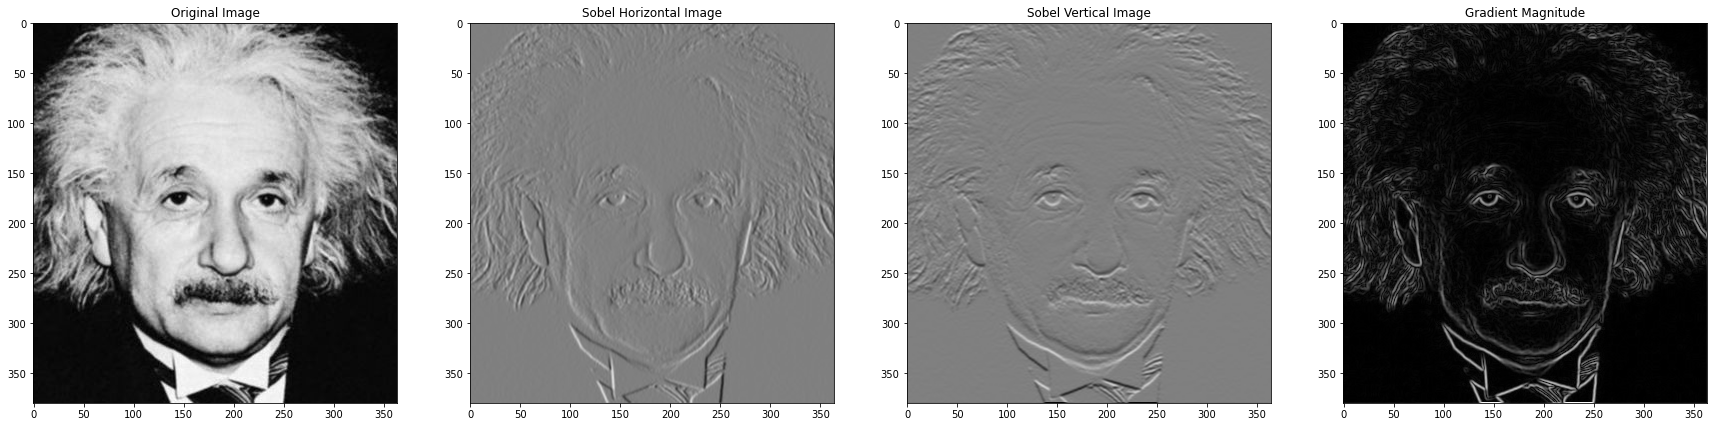

In [84]:
# part (b)
# definition for sobel filtering
def sobel_filter(image, kernal):
    h, w = np.shape(image)
    k_size = len(kernal)
    pad_size = k_size//2
    upper_pad = np.zeros((pad_size, w + 2*pad_size))
    lower_pad = upper_pad
    mid_pad = np.zeros((h, pad_size))
    mid_img = np.append(mid_pad, image, axis = 1)
    mid_img = np.append(mid_img, mid_pad, axis = 1)
    new_image = np.concatenate((upper_pad, mid_img, lower_pad))

    convoluted_img = np.zeros((h, w))
    for row in range(pad_size, h+pad_size):
        for col in range(pad_size, w+pad_size):
            neighbourhood = np.array([[new_image[row-1][col-1], new_image[row-1][col], new_image[row-1][col+1]], [new_image[row][col-1], new_image[row][col], new_image[row][col+1]], 
            [new_image[row+1][col-1], new_image[row+1][col], new_image[row+1][col+1]]])
            convoluted_img[row - pad_size][col - pad_size] = int(sum(sum(np.multiply(neighbourhood, kernal))))
    return convoluted_img


image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
sobel_h_img = sobel_filter(image, sobel_h_kernal)
sobel_v_img = sobel_filter(image, sobel_v_kernal)
gradient_img = (sobel_h_img**2 + sobel_v_img**2) ** 0.5

fig, ax = plt.subplots(1, 4, figsize = (30, 10))
ax[0].imshow(image,  cmap=  'gray', vmin = 0, vmax = 255) 
ax[0].set_title('Original Image')
ax[1].imshow(sobel_h_img, cmap=  'gray' , vmin = -1020 , vmax = 1020 )
ax[1].set_title('Sobel Horizontal Image')
ax[2].imshow(sobel_v_img,cmap=  'gray' , vmin = -1020 , vmax = 1020  )
ax[2].set_title('Sobel Vertical Image')
ax[3].imshow(gradient_img , cmap=  'gray')
ax[3].set_title('Gradient Magnitude')
plt.show()


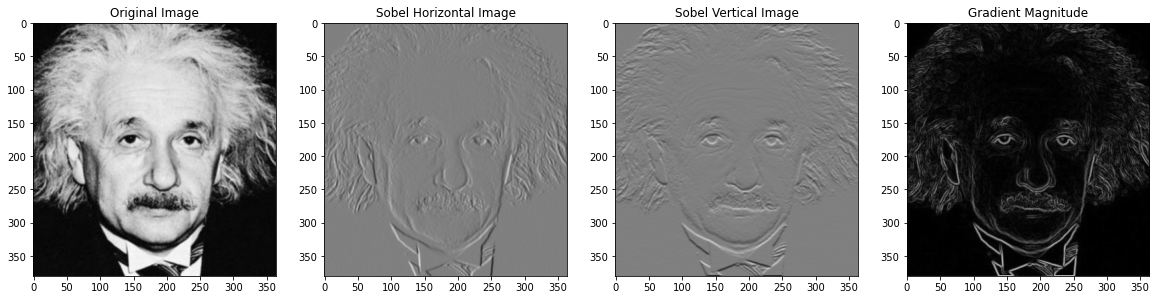

In [86]:
# part (c)
f = np.array([[1],[2],[1]], dtype=float)
x = np.array([[-1,0,1]], dtype=float)
dx =cv.filter2D(image,-1, x)
sobel_x = cv.filter2D(dx,-1, f) 

g = np.array([[1,2,1]], dtype=float)
y = np.array([[-1],[0],[1]], dtype=float)
dy =cv.filter2D(image, -1, y)
sobel_y = cv.filter2D(dy, -1, g)

grad_conv = (sobel_x**2 + sobel_y**2) ** 0.5

fig,ax =plt.subplots(1 ,4 ,figsize = (20,20) )

ax[0].imshow(image,  cmap=  'gray', vmin = 0, vmax = 255) 
ax[0].set_title('Original Image')
ax[1].imshow(sobel_h_img, cmap=  'gray' , vmin = -1020 , vmax = 1020 )
ax[1].set_title('Sobel Horizontal Image')
ax[2].imshow(sobel_v_img,cmap=  'gray' , vmin = -1020 , vmax = 1020  )
ax[2].set_title('Sobel Vertical Image')
ax[3].imshow(gradient_img , cmap=  'gray')
ax[3].set_title('Gradient Magnitude')

plt.show()

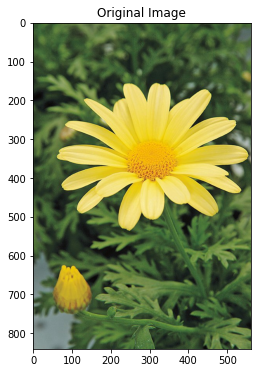

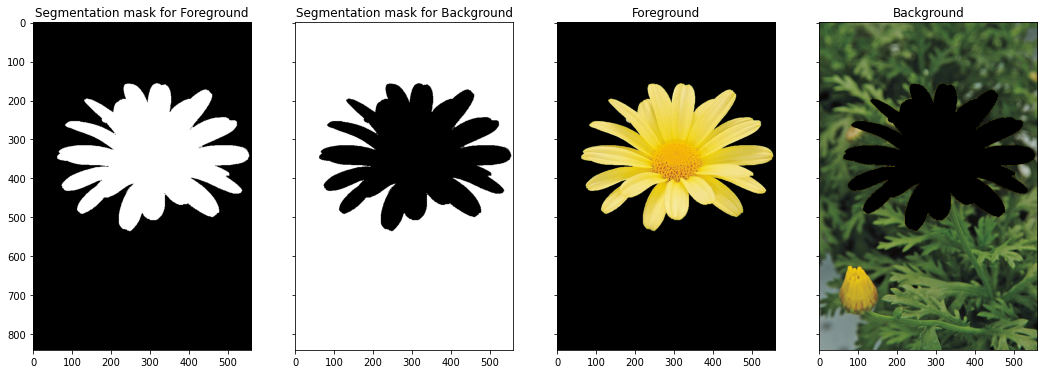

In [1]:
# Question 07
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('daisy.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
mask1 = np.zeros(image.shape[:2], dtype=np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (50, 150, 520, 400)
cv.grabCut(image, mask1, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask1 == 0) | (mask1 == 2), 0, 1).astype(np.uint8)
mask3 = np.where((mask1 == 1) | (mask1 == 3), 0, 1).astype(np.uint8)
foreground = image * mask2[:,:,np.newaxis]
background = image * mask3[:,:,np.newaxis]

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)
ax.set_title("Original Image")

fig, ax = plt.subplots(1, 4, sharex='all', sharey='all', figsize = (18, 18))
ax[0].imshow(mask2, cmap='gray')
ax[0].set_title("Segmentation mask for Foreground")
ax[1].imshow(mask3, cmap='gray')
ax[1].set_title("Segmentation mask for Background")
ax[2].imshow(foreground)
ax[2].set_title("Foreground")
ax[3].imshow(background)
ax[3].set_title("Background")


plt.show()

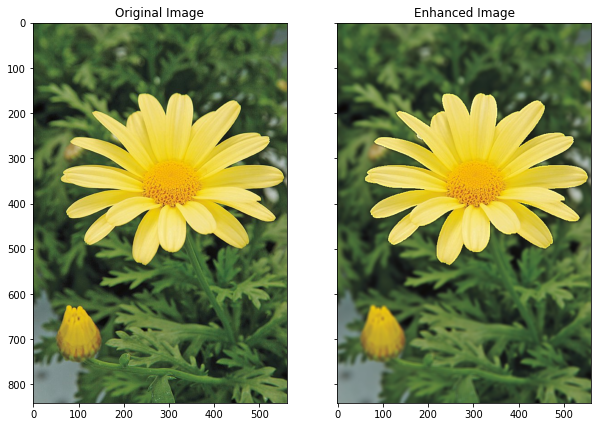

In [5]:
blur = cv.GaussianBlur(background, (7, 7), 10)
enhanced_image = cv.add(blur, foreground)

fig,axes = plt.subplots(1,2,sharex='all',sharey='all',figsize=(10, 10))

axes[0].imshow(image)
axes[0].set_title("Original Image")

axes[1].imshow(enhanced_image)
axes[1].set_title("Enhanced Image")

plt.show()